In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [86]:
df =pd.read_csv("mushrooms.csv")
df3 =pd.read_csv("mushrooms.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [71]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [72]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [75]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [76]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [111]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])



In [112]:
df.sample()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5497,0,2,3,6,0,5,1,0,1,10,0,0,2,0,7,7,0,2,1,1,1,4,0


In [79]:
X = df.drop(columns=["class"],axis=1)
y = df["class"]

In [80]:
y.sample()

2451    0
Name: class, dtype: int32

In [81]:
modelSVC = SVC()

model_kneighbor = KNeighborsClassifier()

In [14]:
parametersSVC = {
    "kernel" : ["linear","poly","rbf","sigmoid"],
    "C":[1,5,10,15,20]
}

In [15]:
parameterskneighbor = {
    "n_neighbors":[1,5,10,15,20],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
    "weights":['uniform', "distance"]
}

In [16]:
df.shape

(8124, 23)

In [17]:
classifer1 = GridSearchCV(modelSVC,parametersSVC,cv=5)
classifer2 = GridSearchCV(model_kneighbor,parameterskneighbor,cv=5)

In [18]:
classifer1.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [19]:
classifer2.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 5, 10, 15, 20],
                         'weights': ['uniform', 'distance']})

In [20]:
best_params = classifer1.best_params_
best_params

{'C': 20, 'kernel': 'linear'}

In [21]:
hightest_acc = classifer1.best_score_
hightest_acc

0.8988096248579007

In [28]:
hightest_acc2 = classifer2.best_score_
hightest_acc2

0.9065475558923834

In [29]:
results1 = pd.DataFrame(classifer1.cv_results_)
results1[["mean_test_score","rank_test_score","params"]][results1["rank_test_score"]==1]

,mean_test_score,rank_test_score,params
16,0.89881,1,"{'C': 20, 'kernel': 'linear'}"


In [30]:
results2 = pd.DataFrame(classifer2.cv_results_)
results2[["mean_test_score","rank_test_score","params"]][results2["rank_test_score"]==1]

,mean_test_score,rank_test_score,params
0,0.906548,1,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
1,0.906548,1,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
30,0.906548,1,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig..."
31,0.906548,1,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig..."


In [41]:
results2["params"][0]

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [40]:
results2[["params"]][results2["rank_test_score"]==1]


,params
0,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
1,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
30,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig..."
31,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig..."


In [43]:
best_model = KNeighborsClassifier(algorithm =  'auto', n_neighbors =  1, weights =  'uniform')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7479,0,0,0,3,0,5,1,1,0,10,...,1,7,7,0,2,2,4,7,3,1


In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [46]:
best_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
predicted_values = best_model.predict(X_test)

In [65]:
list(label_encoder.inverse_transform(predicted_values))

['g',
 'd',
 'd',
 'g',
 'd',
 'g',
 'g',
 'g',
 'd',
 'd',
 'g',
 'd',
 'd',
 'g',
 'g',
 'g',
 'd',
 'g',
 'd',
 'd',
 'd',
 'g',
 'g',
 'd',
 'g',
 'g',
 'g',
 'd',
 'g',
 'd',
 'g',
 'd',
 'g',
 'g',
 'd',
 'd',
 'g',
 'd',
 'd',
 'd',
 'g',
 'd',
 'g',
 'd',
 'd',
 'g',
 'd',
 'g',
 'd',
 'd',
 'g',
 'd',
 'd',
 'g',
 'g',
 'd',
 'g',
 'd',
 'd',
 'g',
 'd',
 'g',
 'g',
 'd',
 'd',
 'd',
 'd',
 'g',
 'd',
 'g',
 'g',
 'd',
 'd',
 'd',
 'g',
 'd',
 'g',
 'd',
 'd',
 'g',
 'g',
 'g',
 'g',
 'd',
 'g',
 'd',
 'd',
 'd',
 'd',
 'g',
 'g',
 'g',
 'd',
 'g',
 'g',
 'g',
 'd',
 'd',
 'd',
 'g',
 'g',
 'd',
 'g',
 'd',
 'g',
 'd',
 'g',
 'g',
 'd',
 'g',
 'd',
 'd',
 'g',
 'g',
 'g',
 'd',
 'g',
 'd',
 'd',
 'd',
 'g',
 'd',
 'g',
 'd',
 'g',
 'd',
 'g',
 'd',
 'd',
 'd',
 'd',
 'd',
 'd',
 'g',
 'g',
 'g',
 'd',
 'g',
 'g',
 'd',
 'd',
 'g',
 'd',
 'g',
 'd',
 'd',
 'g',
 'd',
 'd',
 'd',
 'g',
 'g',
 'g',
 'g',
 'g',
 'd',
 'g',
 'd',
 'g',
 'g',
 'g',
 'g',
 'g',
 'd',
 'g',
 'd',
 'g'

In [82]:
best_model.predict([[2,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2]])

C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [85]:
label_encoder.inverse_transform([[0]])

C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['d'], dtype=object)

In [97]:
def compare_models_train_test():
    best_model.fit(X_train,Y_train)

    test_data_prediction = best_model.predict(X_test)

    accuracy = accuracy_score(Y_test,test_data_prediction)

    print("Acc score of the ",best_model, " = ",accuracy)

In [98]:
compare_models_train_test()

Acc score of the  KNeighborsClassifier(n_neighbors=1)  =  1.0


In [101]:
cv_score_lr = cross_val_score(KNeighborsClassifier(algorithm =  'auto', n_neighbors =  1, weights =  'uniform'),X,y,cv=5 )
mean_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_lr = mean_lr*100
mean_lr = round(mean_lr,2)
mean_lr

90.65

In [102]:
cv_score_lr = cross_val_score(SVC(C = 20, kernel =  'linear'),X,y,cv=5 )
mean_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_lr = mean_lr*100
mean_lr = round(mean_lr,2)
mean_lr

89.88

In [106]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [126]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


In [123]:
X_train_prediction = best_model.predict(X_train)
X_test_prediction = best_model.predict(X_test)


In [124]:
precision_train =  precision_score(Y_train, X_train_prediction)
"Traing data precision = ",precision_train

('Traing data precision = ', 1.0)

In [125]:
precision_test =  precision_score(Y_test, X_test_prediction)
"Test data precision = ",precision_test

('Test data precision = ', 1.0)

In [128]:
cf_matrix = confusion_matrix(Y_test,X_test_prediction)
cf_matrix


array([[842,   0],
       [  0, 783]], dtype=int64)

In [131]:
tn, fp, fn ,tp = cf_matrix.ravel()
tn, fp, fn ,tp

(842, 0, 0, 783)

<Axes: >

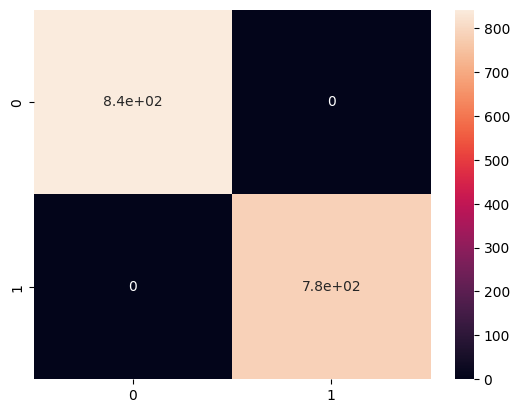

In [130]:
import seaborn as sn

sn.heatmap(cf_matrix,annot=True)